In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. RNA-seq Exercise: Analyzing RNA-seq data for cell lines treated with compounds

Now, we will do an exercise that is similar to what we learned in the last tutorial about analysing RNA-seq data. Compare RNA-seq across different groups after drug treatment (GEO accession: GSE119088)  The goals of this study are to compare NGS-derived transcriptome profiling (RNA-seq) to find out the difference between EZH2 inhibitor treatment and DMSO group in each of 3 cancer cell lines, and find the relationship between transcriptomes change and drug sensivitity.

Read three dataframes and each is for one cell line

In [8]:
df1=pd.read_csv('./undergrad_chemistry_class_tutorial/S7721_transcriptome_change_07042022.csv')
df2=pd.read_csv('./undergrad_chemistry_class_tutorial/U2932_transcriptome_change_07042022.csv')
df3=pd.read_csv('./undergrad_chemistry_class_tutorial/Pfeif_transcriptome_change_07042022.csv')

Pre-processing the data: combining replicates and getting them ready for the exercise

In [9]:
df1['S7721_before_treatment']=(df1.S7721_c1 + df1.S7721_c2 + df1.S7721_c3)/3
df1['S7721_after_treatment']=(df1.S7721_E1 + df1.S7721_E2 + df1.S7721_E3)/3
df1=df1[['ID', 'S7721_before_treatment', 'S7721_after_treatment']]
df2['U2932_before_treatment']=(df2.U2932_c1 + df2.U2932_c2 + df2.U2932_c3)/3
df2['U2932_after_treatment']=(df2.U2932_E1 + df2.U2932_E2 + df2.U2932_E3)/3
df2=df2[['ID', 'U2932_before_treatment', 'U2932_after_treatment']]
df3['pfeif_before_treatment']=(df3.pfeif_c1 + df3.pfeif_c2 + df3.pfeif_c3)/3
df3['pfeif_after_treatment']=(df3.pfeif_E1 + df3.pfeif_E2 + df3.pfeif_E3)/3
df3=df3[['ID', 'pfeif_before_treatment', 'pfeif_after_treatment']]

## 1.1. Make scatter plot to have a visualization of how gene expressions are changed within each cell line after drug treatment

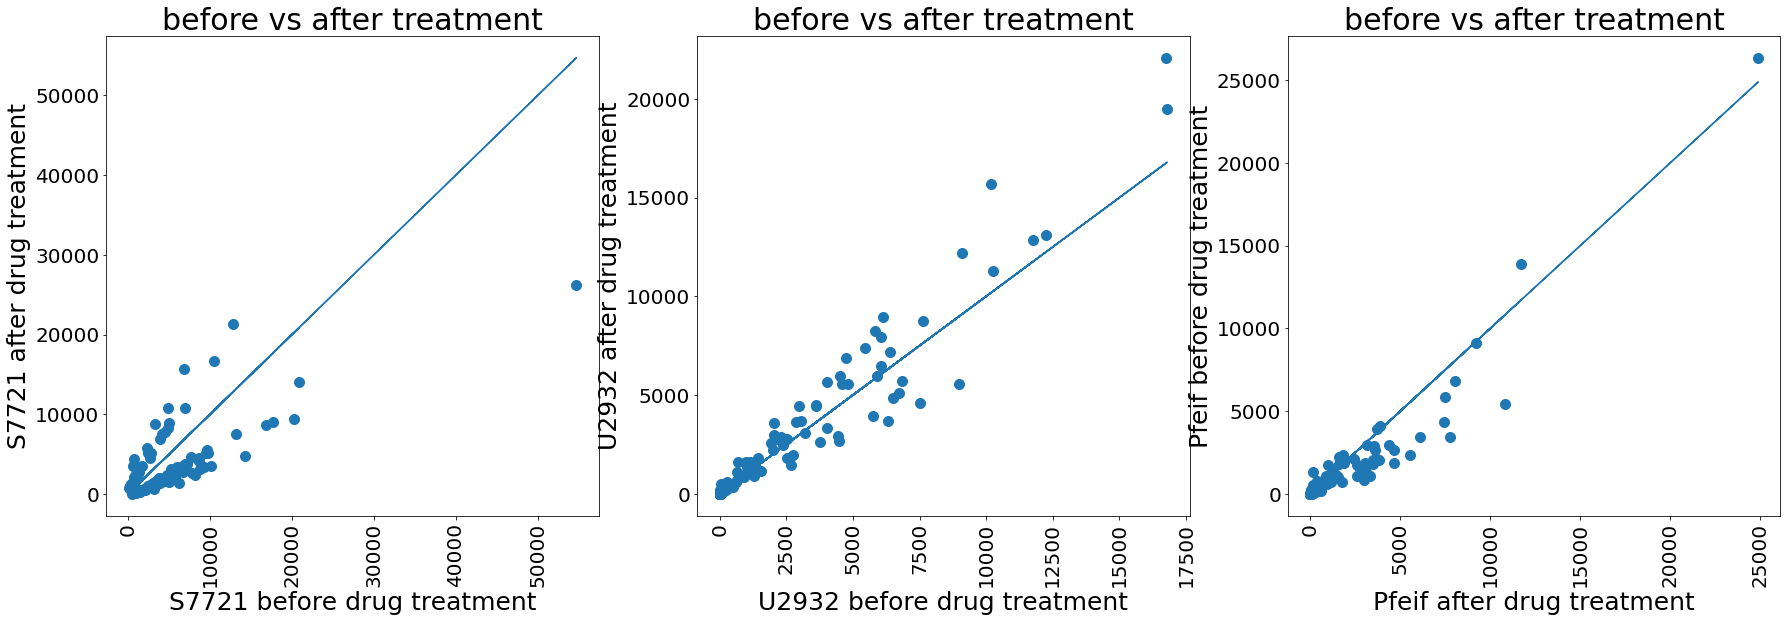

In [10]:
plt.rcParams['font.size'] = 20
plt.rc('axes', labelsize=25)
plt.rc('axes', titlesize=30)
plt.figure(1, figsize=(30, 30))
plt.subplot(331, xlabel='S7721 before drug treatment', ylabel='S7721 after drug treatment', title='before vs after treatment')
plt.scatter(df1.S7721_before_treatment, df1.S7721_after_treatment, s=100)
plt.plot(df1.S7721_before_treatment, df1.S7721_before_treatment, linestyle='-')
plt.xticks(rotation=90)
plt.subplot(332, xlabel='U2932 before drug treatment', ylabel='U2932 after drug treatment', title='before vs after treatment')
plt.scatter(df2.U2932_before_treatment, df2.U2932_after_treatment, s=100)
plt.plot(df2.U2932_before_treatment, df2.U2932_before_treatment, linestyle='-')
plt.xticks(rotation=90)
plt.subplot(333, xlabel='Pfeif after drug treatment', ylabel='Pfeif before drug treatment', title='before vs after treatment')
plt.scatter(df3.pfeif_before_treatment, df3.pfeif_after_treatment, s=100)
plt.plot(df3.pfeif_before_treatment, df3.pfeif_before_treatment, linestyle='-')
plt.xticks(rotation=90)
plt.show()

## 1.2. Find differentially expressed genes within each cell line (the expression of a specific gene is changed more than 4000(take the absolute value here))

In [11]:
df1['deviation']=abs(df1.S7721_before_treatment-df1.S7721_after_treatment)

In [12]:
df2['deviation']=abs(df2.U2932_before_treatment-df2.U2932_after_treatment)

In [13]:
df3['deviation']=abs(df3.pfeif_before_treatment-df3.pfeif_after_treatment)

In [14]:
df1[df1.deviation>4000]

,ID,S7721_before_treatment,S7721_after_treatment,deviation
1,ENSG00000106105,7812.957035,2682.060231,5130.896805
3,ENSG00000090861,10090.066322,3578.817060,6511.249262
5,ENSG00000130707,14297.355543,4735.652678,9561.702864
6,ENSG00000135069,8152.899657,2422.048061,5730.851596
7,ENSG00000113739,6210.639452,1380.934654,4829.704798
10,ENSG00000109971,4934.371507,10841.350607,5906.979100
11,ENSG00000092621,8801.851617,3149.138143,5652.713473
12,ENSG00000128272,9221.372800,3449.587708,5771.785092
13,ENSG00000111371,16852.993725,8627.394793,8225.598932
16,ENSG00000179218,6784.094353,15645.219432,8861.125079


In [15]:
df2[df2.deviation>4000]

,ID,U2932_before_treatment,U2932_after_treatment,deviation
23,ENSG00000103257,16746.065419,22087.590709,5341.525290
34,ENSG00000182199,10189.364884,15713.318620,5523.953736


In [16]:
df3[df3.deviation>4000]

,ID,pfeif_before_treatment,pfeif_after_treatment,deviation
3,ENSG00000090861,7738.211750,3434.753256,4303.458494
23,ENSG00000103257,10828.682961,5396.648473,5432.034488


## 1.3. Make scatter plots highlighting differentially expressed genes in each cell line

For cell line `S7732`:

In [17]:
#Make genes that are differentially expressed into a list
gene_list_for_S7721=df1[df1.deviation>4000].ID.tolist()

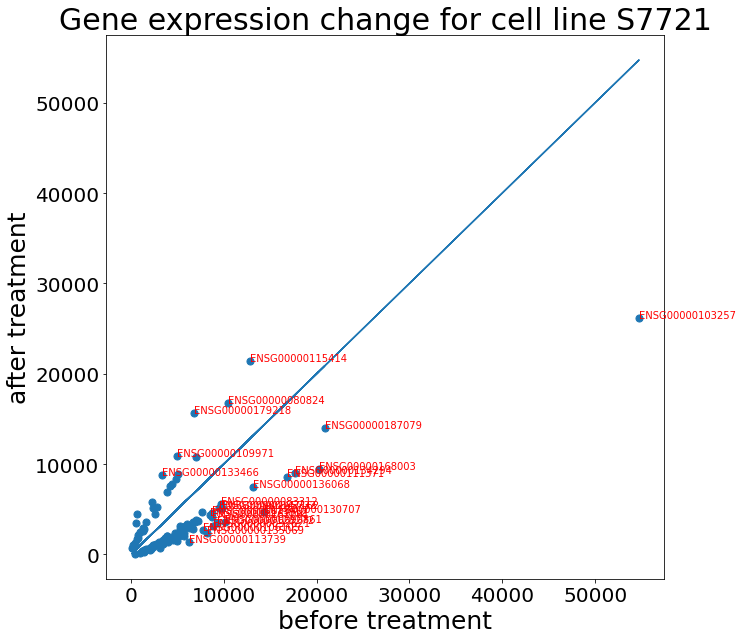

In [18]:
plt.figure(figsize=(10, 10))
plt.scatter(df1['S7721_before_treatment'], df1['S7721_after_treatment'], s=50)
plt.plot(df1.S7721_before_treatment, df1.S7721_before_treatment, linestyle='-')
plt.title("Gene expression change for cell line S7721")
plt.xlabel("before treatment")
plt.ylabel("after treatment")
  
# Loop for annotation of all points
for i in range(len(df1)):
    if df1.ID[i] in gene_list_for_S7721:
        plt.annotate(df1.ID[i], (df1.S7721_before_treatment[i], df1.S7721_after_treatment[i] + 0.1), fontsize=10, color='red')

For cell line `U2932`:

In [19]:
#Make genes that are differentially expressed into a list
gene_list_for_U2932=df2[df2.deviation>4000].ID.tolist()

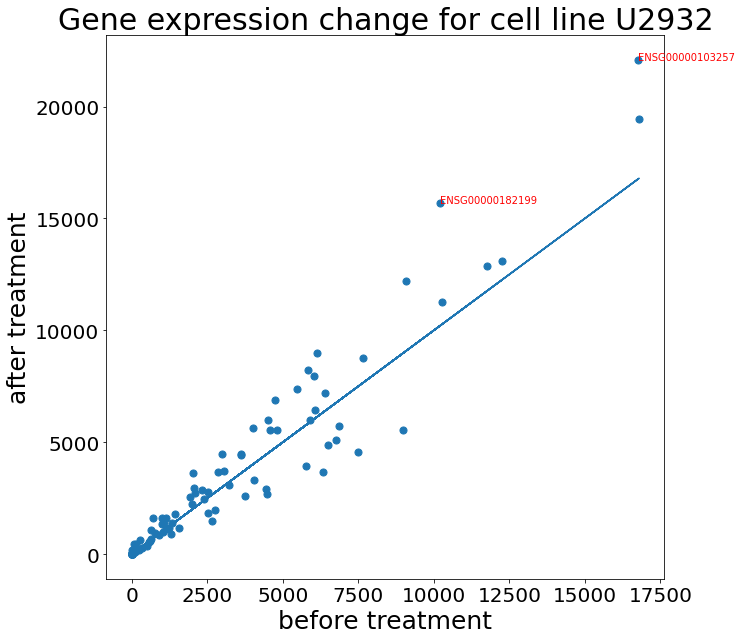

In [20]:
plt.figure(figsize=(10, 10))
plt.scatter(df2['U2932_before_treatment'], df2['U2932_after_treatment'], s=50)
plt.plot(df2.U2932_before_treatment, df2.U2932_before_treatment, linestyle='-')
plt.title("Gene expression change for cell line U2932")
plt.xlabel("before treatment")
plt.ylabel("after treatment")
  
# Loop for annotation of all points
for i in range(len(df2)):
    if df2.ID[i] in gene_list_for_U2932:
        plt.annotate(df2.ID[i], (df2.U2932_before_treatment[i], df2.U2932_after_treatment[i] + 0.1), fontsize=10, color='red')

For cell line `pfeif`:

In [21]:
#Make genes that are differentially expressed into a list
gene_list_for_pfeif=df3[df3.deviation>4000].ID.tolist()

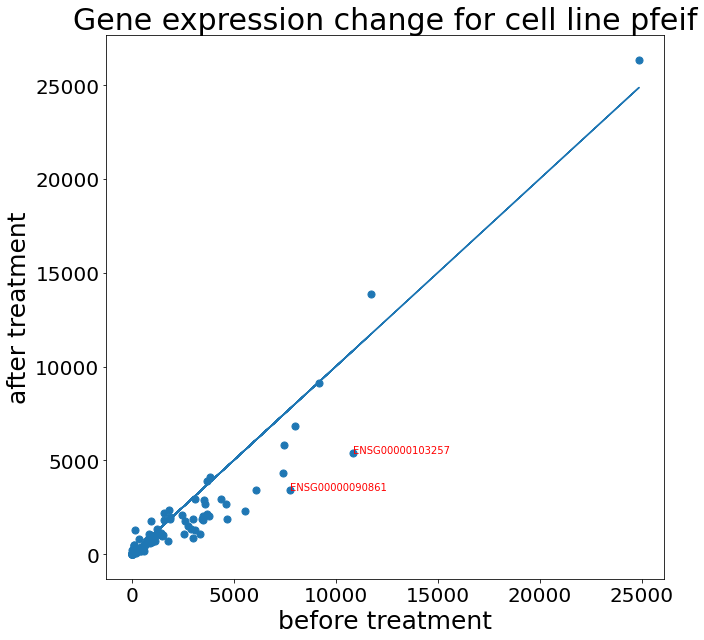

In [22]:
plt.figure(figsize=(10, 10))
plt.scatter(df3['pfeif_before_treatment'], df3['pfeif_after_treatment'], s=50)
plt.plot(df3.pfeif_before_treatment, df3.pfeif_before_treatment, linestyle='-')
plt.title("Gene expression change for cell line pfeif")
plt.xlabel("before treatment")
plt.ylabel("after treatment")
  
# Loop for annotation of all points
for i in range(len(df3)):
    if df3.ID[i] in gene_list_for_pfeif:
        plt.annotate(df3.ID[i], (df3.pfeif_before_treatment[i], df3.pfeif_after_treatment[i] + 0.1), fontsize=10, color='red')

## 1.4. Barplot only differentially expressed genes within each cell line. Two barplots for each cell line---before treatment and after treatment.

Barplot for differentially expressed genes in cell line `S7721` before and after treatment:

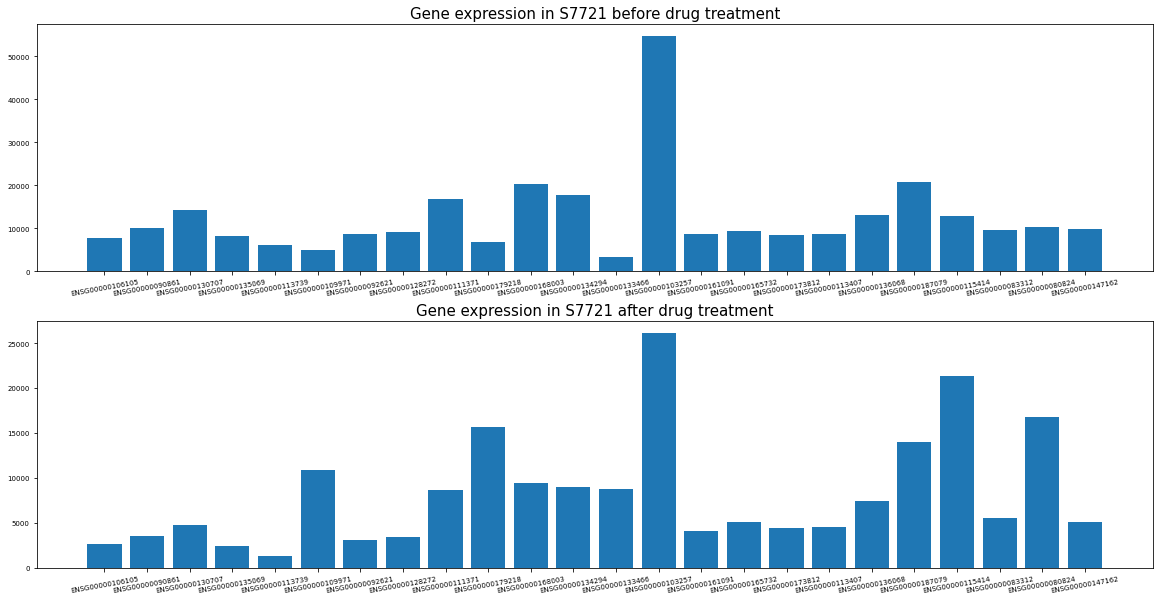

In [23]:
plt.figure(1, figsize=(20, 10))
plt.rcParams['font.size'] = 7
plt.rc('axes', titlesize=15)
plt.subplot(211, title='Gene expression in S7721 before drug treatment')
plt.bar(df1[df1.ID.isin(gene_list_for_S7721)].ID, df1[df1.ID.isin(gene_list_for_S7721)].S7721_before_treatment)
plt.xticks(rotation=10)
plt.subplot(212, title='Gene expression in S7721 after drug treatment')
plt.bar(df1[df1.ID.isin(gene_list_for_S7721)].ID, df1[df1.ID.isin(gene_list_for_S7721)].S7721_after_treatment)
plt.xticks(rotation=10)
plt.show()

Barplot for differentially expressed genes within cell line `U2932` before and after treatment:

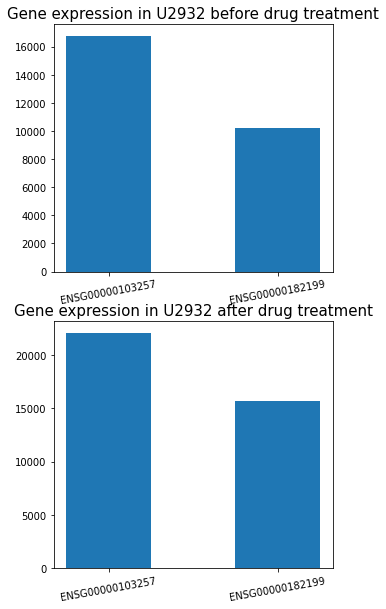

In [24]:
plt.figure(1, figsize=(5, 10))
plt.rcParams['font.size'] = 10
plt.rc('axes', titlesize=15)
plt.subplot(211, title='Gene expression in U2932 before drug treatment')
plt.bar(df2[df2.ID.isin(gene_list_for_U2932)].ID, df2[df2.ID.isin(gene_list_for_U2932)].U2932_before_treatment, width=0.5)
plt.xticks(rotation=10)
plt.subplot(212, title='Gene expression in U2932 after drug treatment')
plt.bar(df2[df2.ID.isin(gene_list_for_U2932)].ID, df2[df2.ID.isin(gene_list_for_U2932)].U2932_after_treatment, width=0.5)
plt.xticks(rotation=10)
plt.show()

Barplot for differentially expressed genes within cell line `pfeif` before and after treatment:

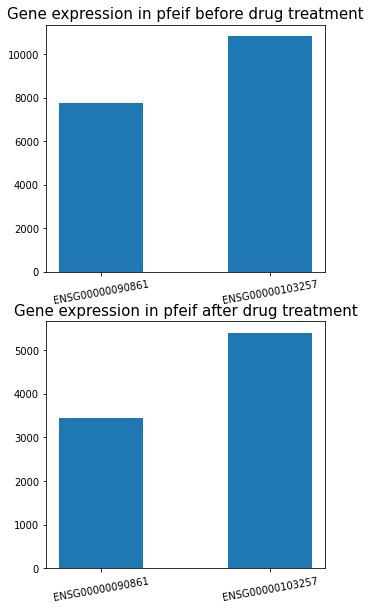

In [25]:
plt.figure(1, figsize=(5, 10))
plt.rcParams['font.size'] = 10
plt.rc('axes', titlesize=15)
plt.subplot(211, title='Gene expression in pfeif before drug treatment')
plt.bar(df3[df3.ID.isin(gene_list_for_pfeif)].ID, df3[df3.ID.isin(gene_list_for_pfeif)].pfeif_before_treatment, width=0.5)
plt.xticks(rotation=10)
plt.subplot(212, title='Gene expression in pfeif after drug treatment')
plt.bar(df3[df3.ID.isin(gene_list_for_pfeif)].ID, df3[df3.ID.isin(gene_list_for_pfeif)].pfeif_after_treatment, width=0.5)
plt.xticks(rotation=10)
plt.show()

## 1.5. Look for gene ontology for differentially expressed genes within each cell line by searching on Uniprot website

It was revealed that EZH2 inhibition resulted in the transcriptional activation of KRAS and MEK pathways

**Acknowledgements:** This tutorial was developed by Yue Wang at the University of North Carolina at Chapel Hill